# IMPORT

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload
import random_graph, pdmm, pdmm_median

reload(random_graph)
reload(pdmm)
reload(pdmm_median)

from random_graph import *
from pdmm import *
from pdmm_median import *

### Generate Graph

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Graph parameters
a = 100                             # Field size
n = 200                              # Number of agents
r = a * np.sqrt(2 * np.log(n)/n)   # Communication range

# Generate agent positions
field_range = np.array([[0, a], [0, a]])
sensor_positions = np.array([
    np.random.uniform(field_range[0, 0], field_range[0, 1], n),
    np.random.uniform(field_range[1, 0], field_range[1, 1], n)
])

# THIS IS NOT THE ADJACENCY MATRIX, IN THIS PROBLEM IT IS EQUIVALENT TO THE INCIDENCE MATRIX
# Calculate adjacency matrix based on communication range
adjacency_matrix = calculate_adjacency_matrix(sensor_positions, r)

Plot graph and check connectivity

The communication range is: 23.02
The graph is connected: False


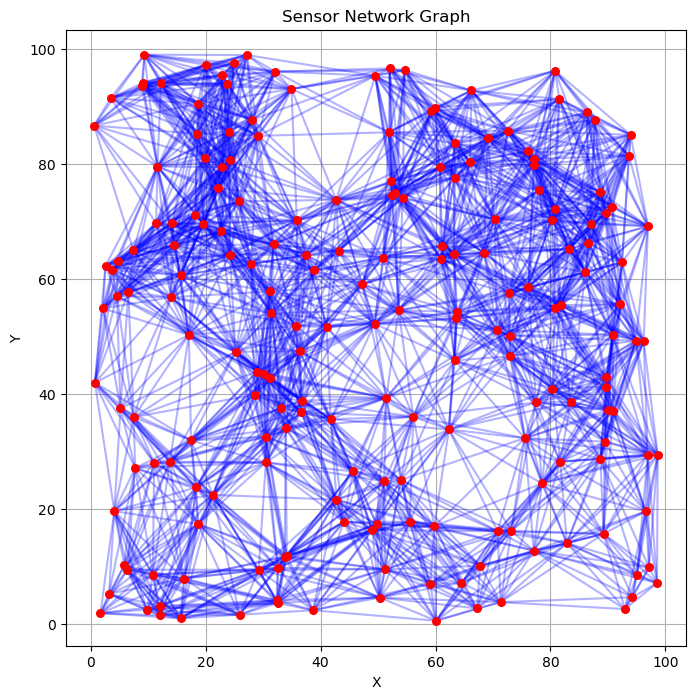

In [4]:
print(f"The communication range is: {r:.2f}")
print(f"The graph is connected: {is_connected(adjacency_matrix)}") # Is connected is not working
plot_graph(sensor_positions, adjacency_matrix)

### Run Synchronous PDMM

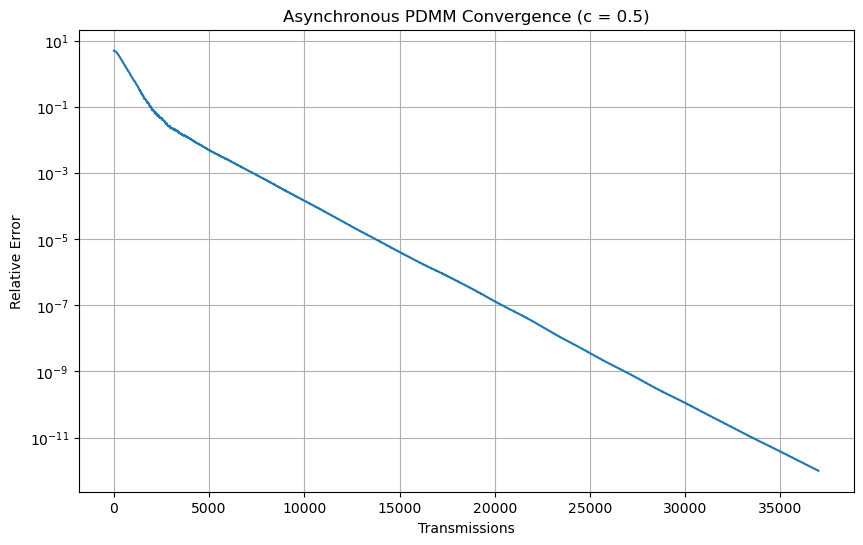

True average: 49.6808
Final average across agents: 49.6808
Min agent value: 49.6808, Max agent value: 49.6808
Final relative error: 9.9476e-13


In [ ]:
# PDMM parameters
max_transmissions = 1e6             # Max PDMM iterations
rho = 0.5                           # Penalty parameter (c)
tolerance = 1e-12                   # Convergence tolerance
sensor_values = np.random.randn(n) * 10 + 50

errors, values, n_transmissions = pdmm_sync(sensor_values, adjacency_matrix, rho, max_transmissions, tolerance)

plt.figure(figsize=(10, 6))
plt.semilogy(range(len(errors)), errors)
plt.xlabel('Transmissions')
plt.ylabel('Relative Error')
plt.title(f'Asynchronous PDMM Convergence (c = {rho})')
plt.grid(True)
plt.show()
print(f"True average: {np.mean(sensor_values):.4f}")
print(f"Final average across agents: {np.mean(values):.4f}")
print(f"Min agent value: {np.min(values):.4f}, Max agent value: {np.max(values):.4f}")
print(f"Final relative error: {errors[-1]:.4e}")

Compare the effect of C values

In [ ]:
# PDMM parameters
max_transmissions = 1e6             # Max PDMM transmissions
rhos = np.linspace(0.01, 1, 100)    # Penalty parameters (c)
tolerance = 1e-12                   # Convergence tolerance

sensor_values = np.random.randn(n) * 10 + 50     # Generate random sensor values
transmissions = np.ones(len(rhos)) * max_transmissions  # Initialize transmission counts
for i, rho in enumerate(rhos):
    errors, values, n_transmissions = pdmm(sensor_values, adjacency_matrix, rho, max_transmissions, tolerance)
    if errors[-1] < tolerance:
        transmissions[i] = n_transmissions

In [ ]:
# Plot convergence for different rho values
plt.figure(figsize=(10, 6))
plt.plot(rhos, transmissions, marker='o', linestyle='-', color='b')
plt.xlabel('Penalty Parameter (c)')
plt.ylabel('Number of Transmissions')
plt.title('PDMM Convergence vs Penalty Parameter')
plt.grid(True)
plt.xticks(rhos, rotation=45)
plt.yticks()  # Show y-axis ticks
plt.tight_layout()
plt.show()

### Run Asynchronous PDMM

C:\Users\Aybar\AppData\Local\Temp\ipykernel_21716\3920782603.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


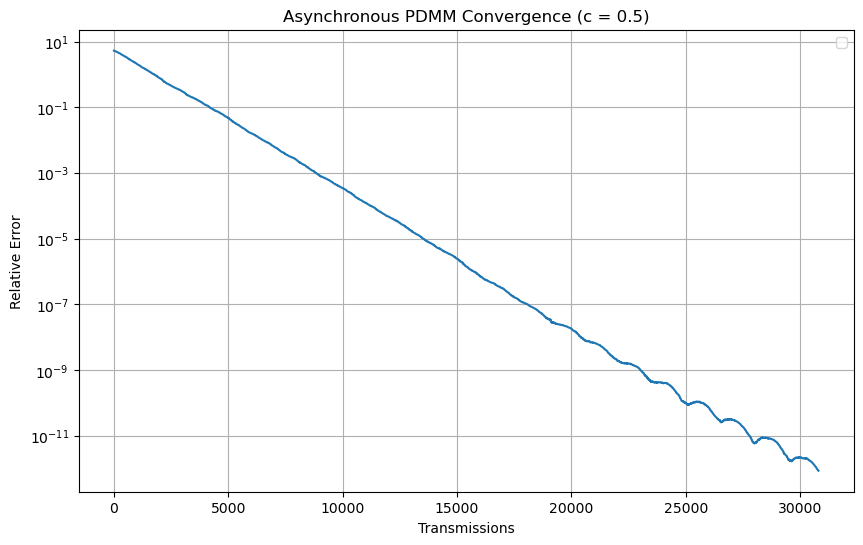

True average: 48.5711
Final average across agents: 48.5711
Min agent value: 48.5711, Max agent value: 48.5711
Final relative error: 8.6596e-13


In [ ]:
# PDMM parameters
max_transmissions = 1e6             # Max PDMM iterations
rho = 0.5                           # Penalty parameter (c)
tolerance = 1e-12                   # Convergence tolerance

sensor_values = np.random.randn(n) * 10 + 50
errors, values, n_transmissions = pdmm_async(sensor_values, adjacency_matrix, rho, max_transmissions, tolerance)

plt.figure(figsize=(10, 6))
plt.semilogy(range(len(errors)), errors)
plt.xlabel('Transmissions')
plt.ylabel('Relative Error')
plt.title(f'Asynchronous PDMM Convergence (c = {rho})')
plt.grid(True)
plt.show()
print(f"True average: {np.mean(sensor_values):.4f}")
print(f"Final average across agents: {np.mean(values):.4f}")
print(f"Min agent value: {np.min(values):.4f}, Max agent value: {np.max(values):.4f}")
print(f"Final relative error: {errors[-1]:.4e}")

# COMPARISON

In [ ]:
# PDMM parameters
max_transmissions = 1e6             # Max PDMM iterations
rho = 0.5                           # Penalty parameter (c)
tolerance = 1e-12                   # Convergence tolerance
sensor_values = np.random.randn(n) * 10 + 50

errors_sync, values_sync, n_transmissions_sync = pdmm_sync(sensor_values, adjacency_matrix, rho, max_transmissions, tolerance)
errors_async, values_async, n_transmissions_async = pdmm_async(sensor_values, adjacency_matrix, rho, max_transmissions, tolerance)

plt.figure(figsize=(10, 6))
plt.semilogy(range(len(errors_sync)), errors_sync, label='Synchronous PDMM')
plt.semilogy(range(len(errors_async)), errors_async, label='Asynchronous PDMM')
plt.xlabel('Transmissions')
plt.ylabel('Relative Error')
plt.legend()
plt.grid(True)
plt.show()